READ IMAGE AND CONVERT TO BINARY

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import sys
import math
%matplotlib inline

# path
path = r'./IMG2.png'
# img = cv2.imread(path)
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# edges = cv2.Canny(img, 80, 120)


image = cv2.imread(path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
im_gray = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
thresh = 50
im_bw = cv2.threshold(im_gray, thresh, 255, cv2.THRESH_BINARY)[1]

# cv2.imwrite("./output.png", im_bw)


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


DETECT HORIZONTAL LINES AND CROP THE IMAGE IN SUBIMAGES FOR EVERY PLAYER 

In [ ]:
# Detect horizontal lines
horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50,1))
detect_horizontal = cv2.morphologyEx(im_bw, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)
cnts = cv2.findContours(detect_horizontal, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# sort by lenght
cnts = sorted(cnts, key=lambda item1: cv2.arcLength(item1, True), reverse=True)
cnts = cnts[0:13]

topImg = None
if((cv2.arcLength(cnts[0], True) - cv2.arcLength(cnts[1], True) > 200) or (cv2.arcLength(cnts[-1], True) - cv2.arcLength(cnts[-2], True) > -200)):
    c1Max = cnts[0][:, :, 1].max()
    c2Max = cnts[1][:, :, 1].max()
    topImg = image[c1Max:c2Max, 0:image.shape[1]]
    cnts = cnts[1:13]
else:
    cnts = cnts[0:12]
    

cnts = sorted(cnts, key=lambda item1: item1[0][0][1])
cropped_imgs = []
# print(cnts[5])
for i in range(0, len(cnts) - 1):
    if(i != 5):
        # get the lowest points of each contour
        c1Max = cnts[i][:, :, 1].max()
        c2Max = cnts[i + 1][:, :, 1].max()
        cropped_imgs.append(image[c1Max:c2Max, 0:image.shape[1]])
    # cv2.drawContours(image, [cnts[i]], 0, (0,255,0), 3)


# cv2.imwrite("./output.png", image)          
# print(len(cropped_imgs))
i = 0
for img in cropped_imgs:
    cv2.imwrite(f"./output{i}.png", img)
    i += 1




DETECT TEXT ON IMAGES

In [ ]:
# from os import walk

# def compareItems(template):
#     template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)

#     files = next(walk('./tempItems'), (None, None, []))[2]  # [] if no file


In [ ]:
class Player:
    def __init__(self):
        pass

    def toString(self):
        return f"lvl: {self.level} champion: {self.champion} username: {self.username} kda: {self.kda} dmg: {self.dmg} gold: {self.gold}"


def closestContour(item, cnt):
    x,y,w,h = cv2.boundingRect(item)
    x2, y2, w2, h2 = cv2.boundingRect(cnt)
    print(x, y, w, h)
    print(x2, y2, w2, h2)
    print(math.sqrt(pow(x - x2- pixelsCropped, 2) + pow((y + h) - y2, 2)))
    return math.sqrt(pow(x - x2- pixelsCropped, 2) + pow((y + h) - y2, 2))
    

In [ ]:
import pytesseract

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'

def readText(image):
    image = 255 - image
    return pytesseract.image_to_string(image, config='--psm 7')
    


In [ ]:
# # Importing the proper classes
# import os
# import pandas as pd
# import matplotlib.pyplot as plt
# from PIL import Image
# from tqdm import tqdm
# import numpy as np
# from annoy import AnnoyIndex
# from tqdm import tqdm
# from keras.preprocessing import image
# from keras.applications.vgg16 import VGG16, preprocess_input
# from keras.models import Model
# from keras.utils import image_utils
# import tensorflow as tf

# def read_data_from_folder(folder_path): # Enter the Single Folder Path/List of the Folders
#     image_path = []
#     for path in os.listdir(folder_path):
#         image_path.append(os.path.join(folder_path,path))
#     return image_path # Returning list of images

# class FeatureExtractor:
#     def __init__(self):
#         # Use VGG-16 as the architecture and ImageNet for the weight
#         base_model = VGG16(weights='imagenet')
#         # Customize the model to return features from fully-connected layer
#         self.model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc1').output)
#     def extract(self, img):
#         # Resize the image
#         img = img.resize((224, 224))
#         # Convert the image color space
#         img = img.convert('RGB')
#         # Reformat the image
#         x = image_utils.img_to_array(img)
#         x = np.expand_dims(x, axis=0)
#         x = preprocess_input(x)
#         # Extract Features
#         feature = self.model.predict(x)[0]
#         return feature / np.linalg.norm(feature)
#     def get_feature(self,image_data:list):
#         self.image_data = image_data 
#         #fe = FeatureExtractor()
#         features = []
#         for img_path in tqdm(self.image_data): # Iterate through images 
#             # Extract Features
#             feature = self.extract(img=Image.open(img_path))
#             features.append(feature)
            
#         return features

# class image_comparator():
#     def __init__(self,image_list:list):
#         self.image_list = image_list
#         if 'meta-data-files' not in os.listdir():
#             os.makedirs("meta-data-files")
#         self.FE = FeatureExtractor()
#     def start_feature_extraction(self):
#         image_data = pd.DataFrame()
#         image_data['images_paths'] = self.image_list
#         f_data = self.FE.get_feature(self.image_list)
#         image_data['features'] = f_data
#         image_data = image_data.dropna().reset_index(drop=True)
#         image_data.to_pickle(os.path.join('meta-data-files/','image_data_features.pkl'))
#         print("Image Meta Information Saved: [meta-data-files/image_data_features.pkl]")
#         return image_data
#     def start_indexing(self,image_data):
#         self.image_data = image_data
#         f = len(image_data['features'][0]) # Length of item vector that will be indexed
#         t = AnnoyIndex(f, 'euclidean')
#         for i,v in tqdm(zip(self.image_data.index,image_data['features'])):
#             t.add_item(i, v)
#         t.build(100) # 100 trees
#         print("Saved the Indexed File:"+"[meta-data-files/image_features_vectors.ann]")
#         t.save(os.path.join('meta-data-files/','image_features_vectors.ann'))
#     def Start(self):
#         if len(os.listdir("meta-data-files/"))==0:
#             data = self.start_feature_extraction()
#             self.start_indexing(data)
#         else:
#             print("Metadata and Features are allready present, Do you want Extract Again? Enter yes or no")
#             flag  = str(input())
#             if flag.lower() == 'yes':
#                 data = self.start_feature_extraction()
#                 self.start_indexing(data)
#             else:
#                 print("Meta data allready Present, Please Apply Search!")
#                 print(os.listdir("meta-data-files/"))

# class SearchImage:
#     def __init__(self):
#         self.image_data = pd.read_pickle(os.path.join('meta-data-files/','image_data_features.pkl'))
#         self.f = len(self.image_data['features'][0])
#     def search_by_vector(self,v,n:int):
#         self.v = v # Feature Vector
#         self.n = n # number of output 
#         u = AnnoyIndex(self.f, 'euclidean')
#         u.load('meta-data-files/','image_features_vectors.ann') # super fast, will just mmap the file
#         index_list = u.get_nns_by_vector(self.v, self.n) # will find the 10 nearest neighbors
#         return dict(zip(index_list,self.image_data.iloc[index_list]['images_paths'].to_list()))
#     def get_query_vector(self,img:list):
#         fe = FeatureExtractor()
#         query_vector = fe.extract(img)
#         return query_vector
#     def get_most_similar_image(self,img:list):
#         query_vector = self.get_query_vector(img)
#         img_dict = self.search_by_vector(query_vector,1)
#         return img_dict


# image_list = read_data_from_folder('tempItems')
# # For Faster Serching we need to index Data first, After Indexing all the meta data stored on the local path
# image_comparator(image_list).Start()
# # for searching you need to give the image path and the number of similar image you want
# # image = cv2.imread('./outputItem.png')
# # SearchImage().get_most_similar_image(image)

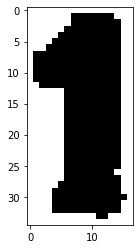

1



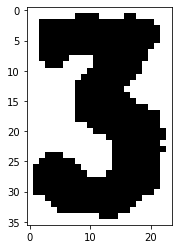

3



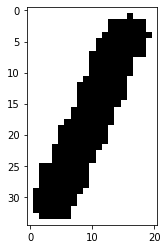

/



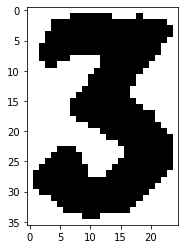

3



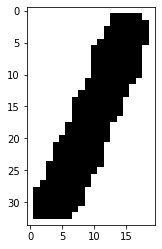

/



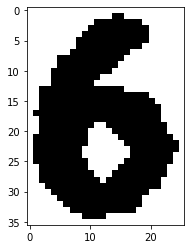

6



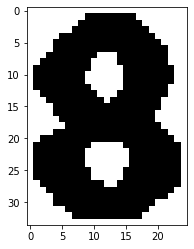

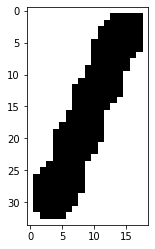

/



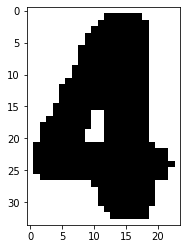

4



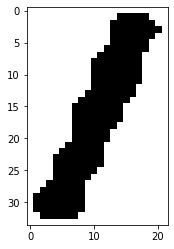

/



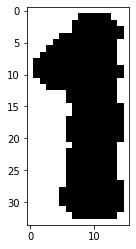

1



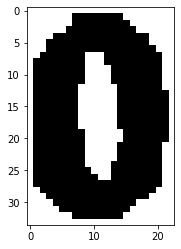

0



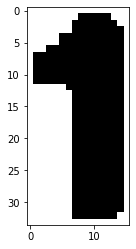

1



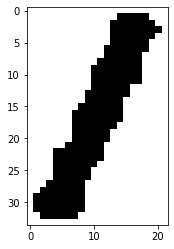

/



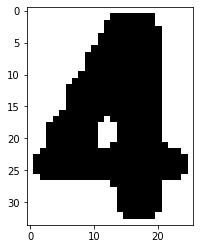

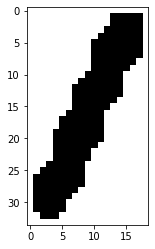

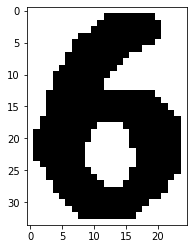

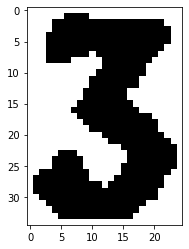

3



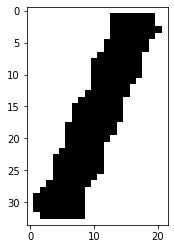

/



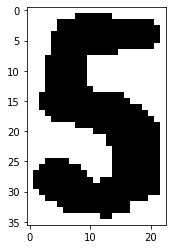

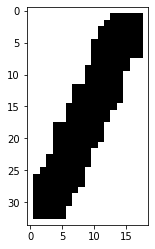

/



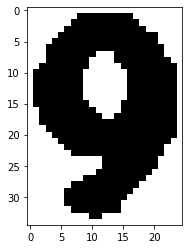

9



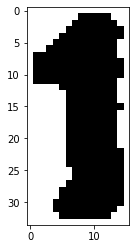

1



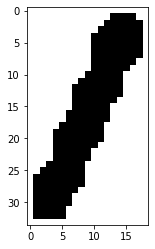

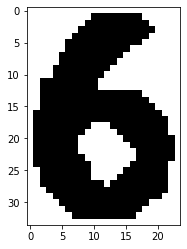

6



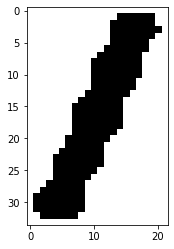

/



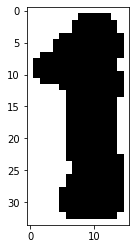

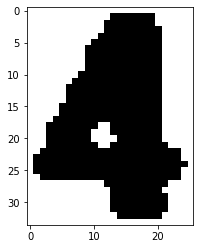

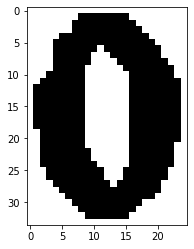

0



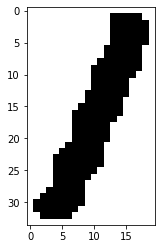

/



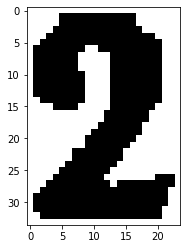

9



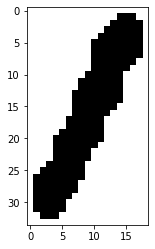

/



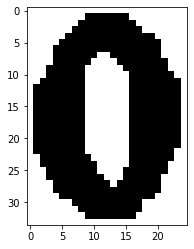

0



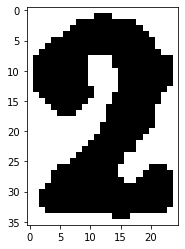

9



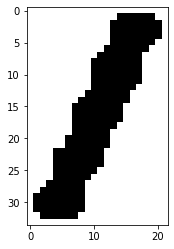

/



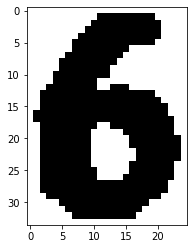

6



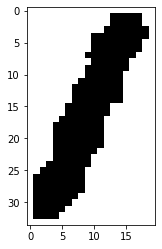

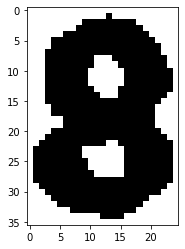

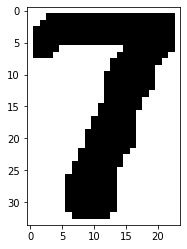

7



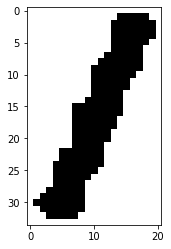

/



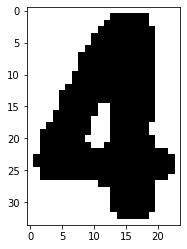

4



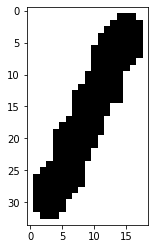

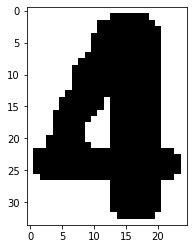

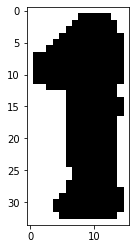

1



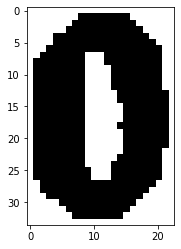

0



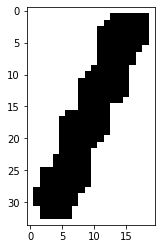

/



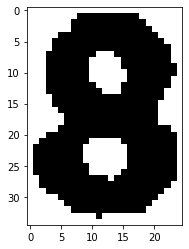

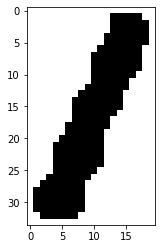

/



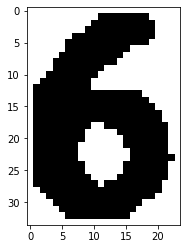

6



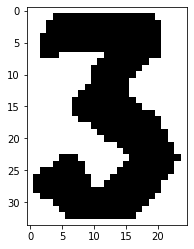

3



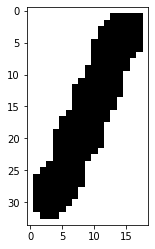

/



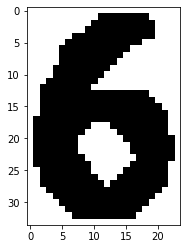

6



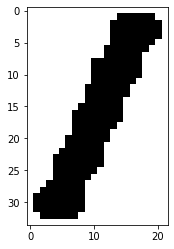

/



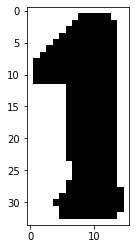

1



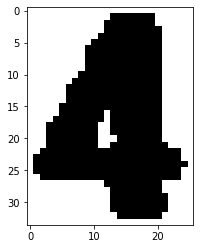


[{'role': 'top', 'username': 'Meditate', 'champion': 'Camille', 'lvl': '15', 'kda': '13/3/6', 'dmg': '25761', 'gold': '15416'}, {'role': 'jungle', 'username': 'pemecu', 'champion': 'Udyr', 'lvl': '15', 'kda': '8/4/10', 'dmg': '12550', 'gold': '13084'}, {'role': 'mid', 'username': 'SKILLI LA FRAUDE', 'champion': 'Skarner', 'lvl': '15', 'kda': '1/4/6', 'dmg': '8799', 'gold': '10193'}, {'role': 'adc', 'username': 'Rotthue', 'champion': 'Swain', 'lvl': '14', 'kda': '3/57/9', 'dmg': '13987', 'gold': '10496'}, {'role': 'support', 'username': 'Scriptina', 'champion': 'Nami', 'lvl': '11', 'kda': '1/6/14', 'dmg': '6248', 'gold': '7269'}, {'role': 'top', 'username': 'Reich und Blond', 'champion': 'tavern - Pern. Ache', 'lvl': '7', 'kda': '0/9/0', 'dmg': '4221', 'gold': '5000'}, {'role': 'jungle', 'username': 'Kaiser Ego', 'champion': 'Volibear', 'lvl': '14', 'kda': '2/6/8', 'dmg': '18635', 'gold': '9701'}, {'role': 'mid', 'username': 'Born to die?', 'champion': 'Taliyah', 'lvl': '16', 'kda': '7

In [2]:
import cv2
import numpy as np
from os import walk, remove
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'
import urllib.request

class Player:
    def __init__(self):
        pass

    def toJson(self):
        return {
            'role': self.role,
            'username': self.username,
            'champion': self.champion,
            'lvl': self.lvl,
            'kda': self.kda,
            'dmg': self.dmg,
            'gold': self.gold,
        }

# DETECT THE RED VERTICAL LINE (ENEMY TEAM) AND CROP THE LEFT PART OF THE IMAGE
def cropLeftPart(image):
    lower_red = np.array([170,50,50])
    upper_red = np.array([360,250,250])
    img_hsl = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(img_hsl, lower_red, upper_red)

    # Detect vertical lines
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,25))
    detect_vertical = cv2.morphologyEx(mask, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
    cnts = cv2.findContours(detect_vertical, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

    # filter by lenght and get the one that is more at the left side of the image
    cnts = filter(lambda item: cv2.contourArea(item) > 100, cnts)
    cnts = sorted(cnts, key=lambda item1: item1[0][0][0])
    x, y, w, h = cv2.boundingRect(cnts[0])
    
    # crop the left part of the image
    return image[:, x + w:]

# DETECT IF THERE IS FRIENDLIST (DILATING THE IMAGE VERTICALLY AND SEARCHING FOR A SEPARATED PART) AND CROP IT
def cropFriendList(image):
    image_enhanced = cv2.equalizeHist(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
    thresh = 200
    img_binary = cv2.threshold(image_enhanced, thresh, 255, cv2.THRESH_BINARY)[1]

    #dilate the image vertically to find the diferents parts of the image
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
    image_dilated = cv2.dilate(img_binary, kernel, iterations=25)

    #find the contours of the image
    cnts = cv2.findContours(image_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    #delete contours that are not useful for this function
    cnts = filter(lambda item: filterVerticalRightSide(item, img_binary), cnts)
    #sort from right to left
    cnts = sorted(cnts, key=lambda item1: item1[0][0][0], reverse=True)
    if(len(cnts) > 0):
        x, y, w, h = cv2.boundingRect(cnts[0])
        return image[:, 0:x - 10] #image without friend list
    
    return image

#DETECT IF THE IMAGE HAS TOP (VICTORY - DEFEAT) AND BOTTOM (PLAY AGAIN) AND CROP IT
def cropTopBottom(image):
    image_enhanced = cv2.equalizeHist(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
    thresh = 250
    im_bw = cv2.threshold(image_enhanced, thresh, 255, cv2.THRESH_BINARY)[1]

    #dilate the image horizontally to find the diferents rows (usually are the top part, players and bottom part)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 1))
    image_dilated = cv2.dilate(im_bw, kernel, iterations=100)
    #dilate once vertically to avoid small parts
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
    image_dilated = cv2.dilate(image_dilated, kernel, iterations=1)

    #find the different rows
    cnts = cv2.findContours(image_dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    #filter small rows
    cnts = filter(lambda item: filterMinVertical(item, im_bw), cnts)
    #sort from top to bottom
    cnts = sorted(cnts, key=lambda item1: item1[0][0][1])

    
    top = None
    bottom = None
    if(len(cnts) > 0):
        foundTop = False
        foundBottom = False
        cnts2 = cnts[:]
        victory_image = None
        #find the top player (if it has a lot of space between the countor and the previous one and is on the top of the image)
        while not foundTop:
            x, y, w, h = cv2.boundingRect(cnts2[0])
            x2, y2, w2, h2 = cv2.boundingRect(cnts2[1])
            if(y2 - (y + h) > image.shape[0] / 20):
                victory_image = image[0:y + h, :]
                top = y2
                foundTop = True
            elif(y > image.shape[0] / 10): 
                top = y
                foundTop = True
            else:
                cnts2.pop(0)
            if(len(cnts2) < 2):
                top = 0
                foundTop = True

        cnts2 = cnts[:]
        #find the bottom player (if it has a lot of space between the countor and the previous one and is on the bottom of the image)
        while not foundBottom:
            x, y, w, h = cv2.boundingRect(cnts2[-1])
            x2, y2, w2, h2 = cv2.boundingRect(cnts2[-2])
            if(y - (y2 + h2) > image.shape[0] / 20):
                bottom = y2 + h2
                foundBottom = True
            elif(y > image.shape[0] / 2):
                bottom = y + h
                foundBottom = True
            else:
                cnts2.pop(-1)
            if(len(cnts2) < 2):
                bottom = image.shape[0]
                foundBottom = True
        
        image = image[top:bottom, :]

        # if the image is too wide it can contain the friend list (the previous function may have failed)
        height = image.shape[0]
        width = image.shape[1]
        if(width / height > 2.25):
            image = image[:, 0: int(2.25 * height)]


        return image, victory_image
    else:
        return None, None

#DETECT EACH PLAYER ROW AND CROP IT
def getPlayerImages(image):
    image_enhanced = cv2.equalizeHist(cv2.cvtColor(image, cv2.COLOR_RGB2GRAY))
    thresh = 250
    im_bw = cv2.threshold(image_enhanced, thresh, 255, cv2.THRESH_BINARY)[1]

    #dilate the image horizontally to find each player row
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 1))
    dilate = cv2.dilate(im_bw, kernel, iterations=100)
    #dilate once vertically to avoid small parts
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 3))
    dilate = cv2.dilate(dilate, kernel, iterations=1)

    #find the different rows
    cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    #filter small rows
    cnts = filter(lambda item: filterMinVertical(item, im_bw), cnts)
    #sort from top to bottom
    cnts = sorted(cnts, key=lambda item1: item1[0][0][1])

    imgs = []
    #if has detected the 10 players, crop each player row
    if(len(cnts) == 10):
        for cnt in cnts:
            x, y, w, h = cv2.boundingRect(cnt)
            imgs.append(image[y:y + h + 5, :])
    #else find the mid gap and crop each player individually (knowing that each part has 5 players)
    else:
        x, y, w, h = cv2.boundingRect(cnts[0])
        x2, y2, w2, h2 = cv2.boundingRect(cnts[-1])

        i = 0
        maxSeparation = 0
        cntTop = None
        cntBottom = None
        #get the contourns with bigger gap between them
        for i in range(0, len(cnts) - 1):
            x3, y3, w3, h3 = cv2.boundingRect(cnts[i])
            x4, y4, w4, h4 = cv2.boundingRect(cnts[i + 1])
            if(y4 - (y3 + h3) > maxSeparation):
                maxSeparation = y4 - (y3 + h3)
                cntTop = cnts[i]
                cntBottom = cnts[i + 1]
            
        #crop each player row
        if(cntTop is not None and cntBottom is not None):
            x4, y4, w4, h4 = cv2.boundingRect(cntBottom)
            height = (y2 + h2 - y4) / 5 + 3
            for i in range(0, 10):
                y5 = y2 - height * i
                if(i > 4):
                    y5 -= maxSeparation / 2
                imgs.append(image[int(y5):int(y5 + height), :])
                imgs.reverse()
    return imgs

#GET THE CONTORNS THAT HAVE A HEIGHT > IMAGE.HEIGHT / 2, ITS WIDTH > IMAGE.WIDTH / 5 AND ARE IN THE RIGHT PART OF THE IMAGE
def filterVerticalRightSide(cnt, image):
    x, y, w, h = cv2.boundingRect(cnt)
    if h > (image.shape[0] / 2) and w < (image.shape[1] / 5) and x > (image.shape[1] * 0.75):
        return True
    return False

#ALL COUNTORNS HAVE TO BE HIGHER THAN THE IMAGE HEIGHT / 30
def filterMinVertical(cnt, image):
    x, y, w, h = cv2.boundingRect(cnt)
    if h > (image.shape[0] / 30):
        return True
    return False

#READ SMALL BLOCK OF NUMBERS
def readLvl(image):
    data = pytesseract.image_to_string(image, config='--oem 3 --psm 6 -c tessedit_char_whitelist=0123456789')
    return data

#READ TEXT
def readTextUsernameAndChampion(image):
    data = pytesseract.image_to_string(image, config='--oem 3 --psm 7')
    return data

#READ A BIGGER BLOCK OF NUMBERS THAN READLVL
def readGoldAndDmg(image):
    data = pytesseract.image_to_string(image, config='--psm 7 --oem 3 -c tessedit_char_whitelist=0123456789')
    return data

#READ SINGLE DIGIT OF KDA (NUMBERS & /)
def readSingleDigit(image):
    data = pytesseract.image_to_string(image, config='--psm 10 -c tessedit_char_whitelist=0123456789/')
    return data

#READ WHOLE KDA (NUMBERS & /)
def readKDA(image):
    data = pytesseract.image_to_string(image, config='--psm 7 -c tessedit_char_whitelist=0123456789/')
    return data

#GET THE ELEMENTS COORDS (LVL, USERNAME, KDA, DMG, GOLD) TO DO THIS WE TRY TO FIND THE ELEMENT IN EACH IMAGE AND THEN ONLY GET THE COORDS THAT HAVE A RELATION BETWEEN (TO AVOID ERRORS)
def getCoords(images, element, x_crop = None):
    images_cropped = []
    #if we want to get the username we have to crop the left part of the image (the lvl part)
    if element == "username":
        if(x_crop == None):
            raise ValueError('Something went wrong')
        for image in images:
            image = images_cropped.append(image[:, x_crop:])
    #if we want to get the dmg or kda we have to crop the right part of the image (gold + dmg(only getting kda))
    elif element == 'dmg' or element == 'kda':
        if(x_crop == None):
            raise ValueError('Something went wrong')
        for image in images:
            images_cropped.append(image[:, :x_crop])
    else:
        images_cropped = images[:]
    
    
    coords = [] #coords of the element that we want to get
    x, y, w, h = 0, 0, 0, 0
    for image in images_cropped:
        #preprocess the image and dilate to get the text in one element when getting the contours
        image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
        thresh = 225
        im_bw = cv2.threshold(image_gray, thresh, 255, cv2.THRESH_BINARY)[1]
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
        dilate = cv2.dilate(im_bw, kernel, iterations=3)
        
        cnts = cv2.findContours(dilate, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        cnts = cnts[0] if len(cnts) == 2 else cnts[1]
        #filter small contours
        cnts = filter(lambda item: cv2.contourArea(item) > 300, cnts)
        #lvl and username are at the left part of the image
        if(element == 'lvl' or element == "username"):
            cnts = sorted(cnts, key=lambda item1: item1[0][0][0])
        #gold, dmg and kda are at the right part of the image
        elif(element == 'gold' or element == 'dmg' or element == 'kda'):
            cnts = sorted(cnts, key=lambda item1: item1[0][0][0], reverse=True)

        if(element == 'lvl' or element == 'username'):
            if(len(cnts) > 2):
                for i in range(0, 2):
                    x, y, w, h = cv2.boundingRect(cnts[i])
                    x2, y2, w2, h2 = cv2.boundingRect(cnts[i + 1])
                    if(x2 - (x + w) > 50):
                        break
                    else:
                        w += x2 - (x + w) + w2
                        
            elif(len(cnts) == 1):
                x, y, w, h = cv2.boundingRect(cnts[0])
            else:
                continue

            if(element == 'lvl'):
                if(x > image.shape[1] / 7):
                    continue
                
                if((w / h) > 1.25):
                    x = int((x + w) - h * 1.25)
                    w = int(h * 1.25)
        else:
            if(len(cnts) > 1):
                x, y, w, h = cv2.boundingRect(cnts[0])

            else:
                continue

        coords.append([x, w])

    #get the coords that have at leat one coord close (looking x)
    i = 0
    finalCoords = []
    for x, w in coords:
        for y in range(i + 1, len(coords)):
            x2, w2 = coords[y]
            if(abs(x - x2) < 30):
                finalCoords.append([x, w])
                break
        i += 1

    x, y, w, h = 0, 0, 0, 0
    if(element == 'lvl'):
        x, y, w, h = 0, 0, 0, 0
        for x2, w2 in finalCoords:
            x += x2
            w += w2
                                        
        if(len(finalCoords) != 0):
            x /= len(finalCoords)
            w /= len(finalCoords)
    else:
        for x2, w2 in finalCoords:
            x = x2 if x2 < x or x == 0 else x
            w = w2 if w2 > w else w
    
    return int(x), 0, int(w), 0

def preprocessImg(img, threshold = 150):
    img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    mask = img < threshold
    img[mask] = 0
    img2 = cv2.copyMakeBorder(img, 10,5,10,5, borderType=cv2.BORDER_CONSTANT, value=0)
    img2 = cv2.equalizeHist(img2)
    img2 = cv2.bilateralFilter(img2,4,25, 25)
    img2 = cv2.resize(img2, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
    img2 = cv2.GaussianBlur(img2, (3, 3), 0)
    img2 = cv2.equalizeHist(img2)
    img2 = 255 - img2
    _,img2 = cv2.threshold(img2,150,255,cv2.THRESH_BINARY)

    return img2


def preprocessImg2(img):
    img2 = cv2.copyMakeBorder(img, 5,5,5,5, borderType=cv2.BORDER_CONSTANT, value=255)
    img2 = cv2.equalizeHist(img2)
    img2 = cv2.bilateralFilter(img2,4,25, 25)
    img2 = cv2.resize(img2, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
    img2 = cv2.GaussianBlur(img2, (3, 3), 0)
    img2 = cv2.equalizeHist(img2)
    _,img2 = cv2.threshold(img2,150,255,cv2.THRESH_BINARY)

    return img2

if __name__ == '__main__':
    # req = urllib.request.urlopen('https://storage.googleapis.com/esportslink-imges/posts/IMG2.png')
    # arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    # image = cv2.cvtColor(cv2.imdecode(arr, -1), cv2.COLOR_BGR2RGB)
    # cv2.imwrite(f"./output/Item.png", image)
    image = cv2.cvtColor(cv2.imread(f'./input/img4.jpg'), cv2.COLOR_BGR2RGB)
    #crop left part (0 -> start of players stats)
    image = cropLeftPart(image)
    cv2.imwrite(f"./output/1.png", image)
    #Crop the friends list (if exists)
    image = cropFriendList(image)
    cv2.imwrite(f"./output/2.png", image)
    #Crop the top (victory - defeat) and bottom (play again) part (if they exist)
    image, victoryImage = cropTopBottom(image) #image is only the part of the players now
    cv2.imwrite(f"./output/3.png", image)

    #if error
    if(len(image) == None):
        raise ValueError('Something went wrong')
    
    #Get each player row (with all the stats)
    playerImages = getPlayerImages(image)
    

    i = 0

    x_lvl, y_lvl, w_lvl, h_lvl = getCoords(playerImages, 'lvl')
    x_username, y_username, w_username, h_username = getCoords(playerImages, 'username', x_lvl + w_lvl)
    x_username += (x_lvl + w_lvl)
    x_gold, y_gold, w_gold, h_gold = getCoords(playerImages, 'gold')
    x_dmg, y_dmg, w_dmg, h_dmg = getCoords(playerImages, 'dmg', x_gold - 5)
    x_kda, y_kda, w_kda, h_kda = getCoords(playerImages, 'kda', x_dmg - 5)
    roles = ['top', 'jungle', 'mid', 'adc', 'support']
    players = []

    for playerRow in playerImages:
        player = Player()
        player.role = roles[i]

        #crop the part of image that contains text and read it
        lvl_image = playerRow[:, x_lvl:x_lvl+w_lvl] 
        lvl_image = preprocessImg(lvl_image)
        player.lvl = readLvl(lvl_image).replace("\n", "")

        
        username_image = playerRow[0:int(playerRow.shape[0] * 0.5), x_username:x_username+w_username]
        username_image = preprocessImg(username_image)
        player.username = readTextUsernameAndChampion(username_image).replace("\n", "")
        cv2.imwrite(f"./output/Item{i}_username.png", username_image)

        champion_image = playerRow[int(playerRow.shape[0] * 0.5):, x_username:x_username+w_username]
        champion_image = preprocessImg(champion_image, 75)
        player.champion = readTextUsernameAndChampion(champion_image).replace("\n", "")


        gold_image = playerRow[0:int(playerRow.shape[0] * 0.55), (x_gold - 5):(x_gold + w_gold + 5)]
        gold_image = preprocessImg(gold_image)
        player.gold = readGoldAndDmg(gold_image).replace("\n", "")

        dmg_image = playerRow[0:int(playerRow.shape[0] * 0.55), (x_dmg - 5):(x_dmg + w_dmg + 5)]
        dmg_image = preprocessImg(dmg_image)
        player.dmg = readGoldAndDmg(dmg_image).replace("\n", "")


        #kda was not reading as good as the other ones, in this case we have divided into digits and read individually and if
        #it fails, we read the whole text
        kda_image = playerRow[0:int(playerRow.shape[0] * 0.55), (x_kda - 5):(x_kda + w_kda + 5)]
        kda_image = preprocessImg(kda_image)
        cv2.imwrite(f"./output/Item_{i}_kda.png", kda_image)

        #find each digit
        contours, hierarchy = cv2.findContours(kda_image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cnts = []
        #check that is not a contour inside a digit
        for y in range(len(contours)):
            if hierarchy[0,y,3] == 0:
                cnts.append(contours[y])
        #sort from left to right
        cnts = sorted(cnts, key=lambda item1: item1[0][0][0])
        kda_string = ''
        for cnt in cnts:
            x_digit, y_digit, w_digit, h_digit = cv2.boundingRect(cnt)
            img_digit = kda_image[y_digit:y_digit+h_digit, x_digit:x_digit+w_digit]
            #add border to the digit to make it easier to read
            # img_digit = cv2.copyMakeBorder(img_digit, 5,5,5,5, borderType=cv2.BORDER_CONSTANT, value=255)
            character = readSingleDigit(img_digit)
            imgplot = plt.imshow(img_digit, cmap='gray')
            plt.show()
            print(character)
            kda_string += character[0] if character != '' and character is not None else '/'
        
        kda_string2 = kda_string
        #it does not have exactly 2 / it means that there is an error in our data, so we read the whole text
        if(kda_string.count('/') != 2 ):
            kda_string = readKDA(kda_image).replace("\n", "")

        kda_split = kda_string.split('/')
        if(len(kda_split[0]) == 0):
            kda_split[0] = kda_string2.split('/')[0]
        if(len(kda_split[-1]) == 0):
            kda_split[-1] = kda_string2.split('/')[-1]
        
        kda_string = '/'.join(kda_split)

        player.kda = kda_string
        players.append(player.toJson())
        
        i += 1
        i %= 5
    
    print(players)

        

